Unit 1, Sprint 3, Module 2

###Learning Objectives:
- Identify the appropriate hypotheses to test for a statistically significant relationship between two quantitative variables
- Conduct and interpret a t-test for the slope parameter
- Identify the appropriate parts of the output of a linear regression model and use them to build a confidence interval for the slope term.
- Make the connection between the t-test for a population mean and a t-test for a slope coefficient.
- Identify violations of the assumptions for linear regression

#Objective - Identify the appropriate hypotheses to test for a statistically significant relationship between two quantitative variables

### Returning to our forensic science example:



Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)? 




Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the Longbones.csv dataset. 

**We wish to determine if there is a relationship between the nitrogen composition of the long bones of the skeleton and the length of time the body was interred.**

Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208

In [1]:
#Import the Longbones.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

#Drop records with NAs and rename the dataset longbones

longbones = df.dropna()

longbones.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0
5,1,68.0,7.0,1,28.0,3.93,0
6,1,71.6,8.0,1,35.0,3.88,0
7,1,70.2,6.0,1,44.0,3.64,0


At the point we left off yesterday, we'd calulated the linear regression line that models the relationship between long bone nitrogen composition and interrment time.

In [5]:
from statsmodels.formula.api import ols
model = ols('Time ~ Nitro', data = longbones).fit()
print(model.params)

Intercept    316.805323
Nitro        -69.242709
dtype: float64


We used those model coefficients to write the least squares regression line

$\hat{Y} = 316.8 - 69.24 X$

And we illustrated the linear regression model graphically by overlaying it on top of the scatterplot of nitrogen composition and interrment time.

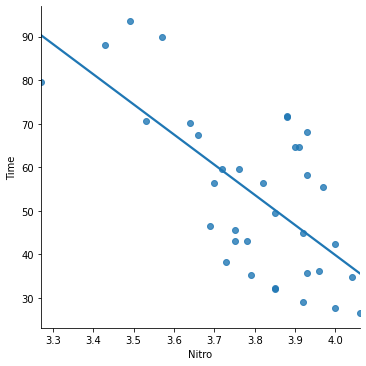

In [6]:
import seaborn as sns
sns.lmplot(x = 'Nitro', y = 'Time', data = longbones, ci = None)

However, there is an important point we haven't addressed yet:

We have only described the relationship between nitrogen composition and interrment time for the skeletons in this particular sample.  We want to know what (if anything) we can say about the the relationship between long bone nitrogen composition and interrment time in the population.

As with the t-test and chi-square test last week, we wish to make a inference about the relationship between nitrogen composition and interrment time in the entire population.

To do that, we're going to have to conduct a statistical hypothesis test.

A quick aside about notation:

When we talked about the t-test last week, we used the symbol $\mu$ to represent the population mean_ and $\bar{x}$ to represent the sample mean.

Similarly, we will use $\beta_0$ and $\beta_1$  to represent the population intercept and slope_, respectively, and b$_0$ and b$_1$ to respresent the sample slope and intercept_.

To make things even more confusing, sometimes people will use $\hat{\beta_0}$ and $\hat{\beta_1}$ to repsresent the sample slope and intercpet, but we've chosen to use $b_0$ and $b_1$ instead.

Sample model: $\hat{y} = b_0 + b_1x$

Population model: $\hat{y} = \beta_0 + \beta_1x$

So - just like when we did the t-test for a population mean - our hypotheses will make claims about the population slope and/or intercept - not the sample slope and/or intercept.

#Objective - Conduct and interpret a t-test for the slope parameter

When testing for a statistically significant relationship between two quantitative variables, the null hypothesis is **always** that the two variables are not related.



Mathematically, that works out to saying that the slope is equal to 0.  Knowing something about the independent variable doesn't tell you anything about the dependent variable.

In symbolic notation, we write this as:

Ho: $\beta_1$ = 0

The alternative hypothesis - unsurprisingly - is that there is between the two variables.

In symbolic notation:

Ha: $\beta_1 \neq0$

Let's look at a picture to make this idea concrete.  

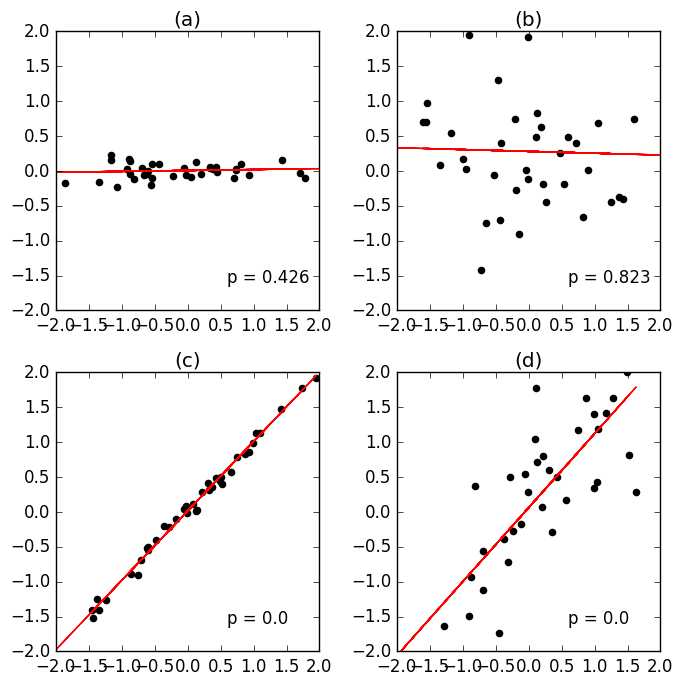

In the first two cases, there is no apparent relationship between x and y and the slope of the regression line appears flat.  (Note that in a) y = 0 no matter what x is).

In c) and d) there is clearly a pretty strong relationship between the two variables and the lines have a non-zero slope.

That leads us back to our original question, **"Is long bone nitrogen composition statistically significanctly associated with interrment time?"**

The null hypothesis is that they are unrelated and the slope is = 0.  The alternative hypothesis is that they are related and the slope is not equal to 0.  In symbolic notation:

Ho: $\beta_1$ = 0

Ha: $\beta_1 \neq$ 0

#Objective - Identify the appropriate parts of the output of a linear regression model and use them to build a confidence interval for the slope term

The model we fit yesterday will do a lot more than just print the model parameters!  

In [8]:
model =ols('Time ~ Nitro', data = longbones).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     26.96
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.05e-05
Time:                        10:00:05   Log-Likelihood:                -141.08
No. Observations:                  35   AIC:                             286.2
Df Residuals:                      33   BIC:                             289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.8053     50.679      6.251      0.0

Right now we just want to look at the middle part of the table where we see the headings coef, std error, t, etc.

We should recognize the values under coef from yesterday. These are the model coefficients that we included in our linear regression model:

$\hat{Y} = 316.8 - 69.24 X$

First off, now that we've written the linear model, we can pretty much ignore the row for the intercept term.  In 99.99% of cases we don't do inference on the intercept.  It's only there to make the math work out.



Instead, we can concentrate on the row for the slope term.  We can pick out that row because it's labeled "Nitro", which is the independent variable.

Reading from left to right, we have the slope coefficient -69.24.  We know what that is already.

The next three entries in the table are the standard error of the slope (std err), a t-statistic (t) and a p-value for our hypothesis test (P > |t|). 

#Objective - Make the connection between the t-test for a population mean and a t-test for the clope coefficient

Yes!  This means that we are testing our hypotheses about the slope paramter using a t-test.  

We didn't talk about it too much at the time, but for a t-test for a population mean, we the t-statistic is calculated as 

\begin{equation}
t = \frac{\bar{x} - \mu_0}{SE}
\end{equation}

Where $\bar{x}$ is the sample mean, $\mu_0$ is the mean under the null hypothesis and SE is the standard error.

Now, the t-statistic is calculated as 

\begin{equation}
t = \frac{b_1 - \beta_1}{SE}
\end{equation}

Where $b_1$ is the slope in the sample, $\beta_1$ is the slope under the null hypothesis and SE is the standard error.

These calculations become really simple when we do inference for regression because



1.   Under Ho, $\beta_1$ = 0
2.   The SE is calculated for you in Python

\begin{equation}
t = \frac{-69.24 - 0}{13.34} = -5.192
\end{equation}


But wait!  There's more!

We didn't even need to calculate the t-statistic.  It was given in the output under "t".

We don't have to calculate the p-value either, because that's given under P > |t|.

Recall that we eject the null hypothesis for a p-value less than the signficance level



Looking back at our results, we see that the p-value rounds to 0.000.  That doesn't mean that the p-value is actually 0, it just means that it is less than 0.0005.  

That's enough information for us to reject the null hypothesis at the alpha = 0.05 level (or alpha = 0.01 for that matter) and conclude that there is a statistically significant relationship between long bone nitrogen composition and interrment time.



---



Okay... so now what?????

Does that mean that the slope of the model for the relationship between nitrogen composition and interrment time in the population is exactly equal to -69.24?

As we learned when we were creating confidence intervals for a population mean, the answer is "probably not".

Had the researchers exhumed a differnet sample of bodies from different cemeteries, the exact slope coefficient calculated would probably be slightly different.

Therefore, we want to estimate the population slope coefficient using a confidence interval.

And good news!  That information is given to us in our output, too.  It's the last two entries of of the Nitro line.


-96.375  to   -42.110

Note that the heading [0.025      0.975] is bookending the middle 0.95 of the data, so the two values below give the lower and upper bounds of a 95% confidence interval.

We are 95% confident that the true slope of the relationship between long bone nitrogen composition and interrment time in the population is between -96.37 to -42.11 years per 1g of nitrogen.

We can plot the confidence limits on our slope and intercept terms with a shaded area around our regression line.

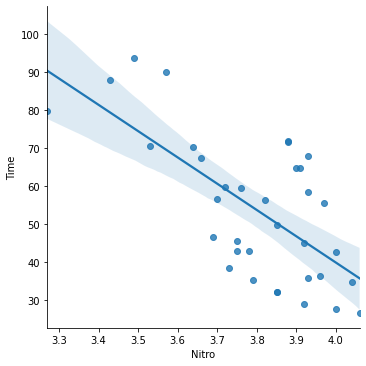

In [9]:
sns.lmplot(x = 'Nitro', y = 'Time', data = longbones)

We believe that the true regression line for the model could show up anywhere in that shaded blue area.

#Objective - Identify violations of the assumptions for linear regression

Linear regression is great!  What could possibly go wrong?!?



A few things to watch out for:

1) Linear regression can only model the relationship between two quantitative variables.  Often we will want to model the relationship between a predictor variable and a categorical (usually yes or no) outcome.

For this, we'll need *logistic* regression.  This is convered in Unit 2.

2) Linear regression models the *linear* relationship between two variables. If the relationship between your variables is not linear, you won't get a very good answer using linear regression.

Let's look at an example.

How do environmental factors contribute to the diversity of plant life on an island? The Plants.csv dataset provides information on a number of characteristics of the British Isles (not including Ireland or Britain itself) including latitude, area, and distance from Britain. We wish to use linear regression to determine if islands with a larger area are home to a greater number of species of plant life.

Sources:

M.P. Johnson and D.S. Simberloff (1974). "Environmental Determinants
of Island Species Numbers in the British Isles," Journal of Biogeography, Vol. 1, pp. 149-154

E.D. McCoy and E.F. Connor (1976). "Environmental Determinants of Island Species Number in the British Isles: A Reconsideration," Journal of Biogeography, Vol. 3, pp. 381-382.

In [11]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Plants/Plants.csv'

plants = pd.read_csv(data_url, skipinitialspace=True, header=0)
print(plants.shape)
plants.head()



(41, 7)


,Island,Area,Elevation,Soil,Latitude,Distance,Species
0,Ailsa,0.8,340,1,55.3,14.0,75
1,Anglesey,712.5,127,3,53.3,0.2,855
2,Arran,429.4,874,4,55.6,5.2,577
3,Barra,18.4,384,2,57.0,77.4,409
4,Bressay,31.1,226,1,60.1,201.6,177


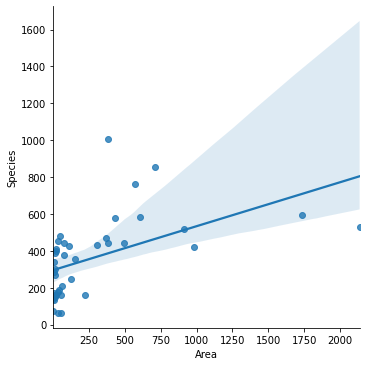

In [13]:
sns.lmplot(x = 'Area', y = 'Species', data = plants)

Just by inspection we can see that this model doesn't look like it fits very well!

If you run into a situation like this, there are different transformations that can be done to a predictor variable (taking the natural log, for example) that can bring the relationship into a straight line.  

We'll talk about this notion in a little bit.

3) What is the population that we can draw conclusions about?

In the case of longbones dataset, we can probably draw conclusions about the population of burials in that area of England or in other places with similar climates and soil composition.

Would the model give us a good prediction for a body that was buried in Sub-Saharan Africa?

Probably not.

4) Beware of outliers and influential points.

A single point can "pull" the linear regression relationship way out of whack.  You must use your judgement (and help from subject matter experts) to determine what should be done with an outlier.

Often separate models are created with and without the outlier and both sets of results are presented for the reader to evaluate.

A notorious example: The relationship between votes for George W. Bush and Pat Buchanan in the 2000 presidental election in Florida. 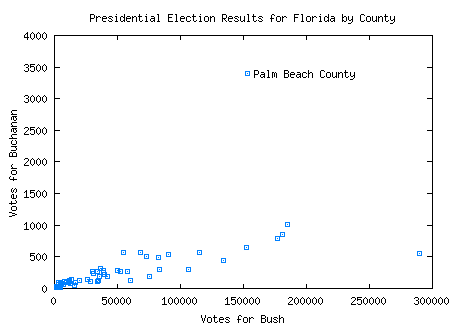

5) Correlation $\neq$ causation

You've probably heard it before, but it bears repeating.

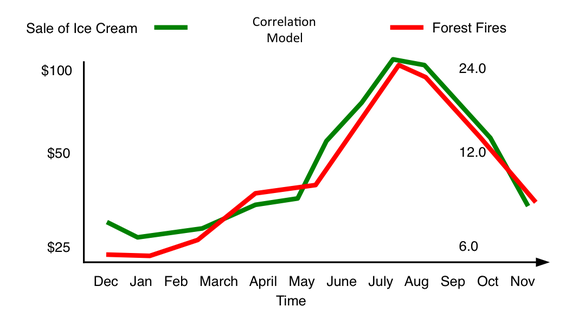

Sometimes two variables will appear correlated and there will be no obvious reason why.

Sometimes two variables will appear correlated because an outside factor called a __________ is causing changes in both.

As we can see above, ice cream sales don't cause forest fires.  However, both increase in the summer months and decrease in the winter months.

#Let's return to the sleep example

Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [14]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


In yesterday's assignment, we saw that non-dreaming sleep and total sleep were highly correlated.  However, dreaming sleep is more variable among mammals.  Let's continue to explore the relationship of other variables to the amount of time spent in dreaming sleep.

First, lets see if time spent in non-dreaming and dreaming sleep is statistically significantly related in mammals.


Plot the relationship between non-dreaming sleep and dreaming sleep.

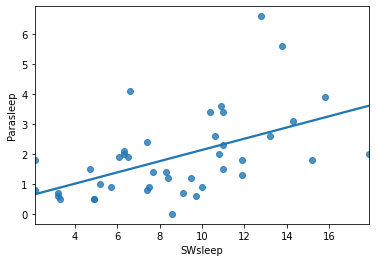

In [15]:
import seaborn as sns

#Turn off CI plotting for today
ax = sns.regplot(x="SWsleep", y="Parasleep", data=sleep, ci=None)

How would we test the hypothesis that the amount of time spend in non-dreaming and dreaming sleep are unrelated vs the hypothesis that they are related?

The null hypothesis is that they are unrelated and the slope is 0.  The alternative hypothesis is that they are related and the slope is not equal to 0.  In symbolic notation:

Ho: $\beta_1$ = 0

Ha: $\beta_1 \neq$ 0

Test these hypotheses using statsmodels.api

In [20]:
import statsmodels.api as sm

#Enter the model in the format Y ~ X

model_sleep = ols('Parasleep ~ SWsleep', data = sleep).fit()
print(model_sleep.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     14.69
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           0.000439
Time:                        11:49:46   Log-Likelihood:                -66.316
No. Observations:                  42   AIC:                             136.6
Df Residuals:                      40   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2602      0.466      0.558      0.5

At the 0.05 level We reject the null hypothesis and conclude there is a statistically significant relationship between the amount of non-dreaming and dreaming sleep a mammal gets daily.

What other factors might be related to how much dreaming sleep a mammal gets?  Let's look at life expectancy.

Let's see if life expectancy is linearly related to the amount of dreaming sleep a mammal gets each day.

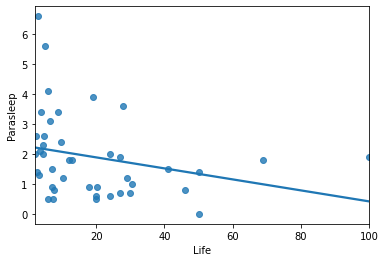

In [23]:
#Use Seaborn to create the scatterplot and overlay the regression line

import seaborn as sns

#Turn off CI plotting for today
ax = sns.regplot(x="Life", y="Parasleep", data=sleep, ci=None)

How does the model fit the data??????

In [24]:
import statsmodels.api as sm

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Life', data=sleep).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.104
Date:                Mon, 02 Aug 2021   Prob (F-statistic):             0.0858
Time:                        11:55:31   Log-Likelihood:                -71.315
No. Observations:                  42   AIC:                             146.6
Df Residuals:                      40   BIC:                             150.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2564      0.291      7.757      0.0

What are our conclusions here?????
At the 0.05 level, we will fail to reject the null hypothesis that life expectancy is not linearly related to the amohnt of dreaming in mammals

###Logarithms

Any time you see a relationship that looks like a flattening curve, the relationship may be logarithmic.

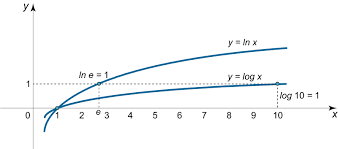

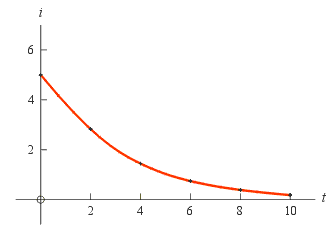

One thing we can do when we have a potential non-linear relationship between two variables is take the natural logarithm of the x-variable.  This will sometimes bring the relationship between the two variables into line.

In other words, a graph of y = ln(x) will be linear.

In [26]:
#Calculate log of life expectancy

import numpy as np
sleep['Log_life'] = np.log(sleep['Life'])
sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_life
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,1.504077
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,4.234107
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,3.295837
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,2.944439
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,3.414443


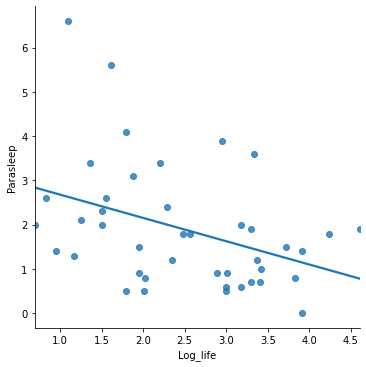

In [32]:
#Use Seaborn to create the scatterplot and overlay the regression line

import seaborn as sns

#Turn off CI plotting for today
sns.lmplot(x="Log_life", y="Parasleep", data=sleep, ci=None)

How is the model fit now?

In [30]:
import statsmodels.api as sm

#Enter the model in the format Y ~ X

model_log_life = ols('Parasleep ~ Log_life', data=sleep).fit()

#Print the model summary
print(model_log_life.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     6.970
Date:                Mon, 02 Aug 2021   Prob (F-statistic):             0.0118
Time:                        12:12:04   Log-Likelihood:                -69.511
No. Observations:                  42   AIC:                             143.0
Df Residuals:                      40   BIC:                             146.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2065      0.534      6.006      0.0

Conclusions???
At the 0.05 level the log of life expectancy does have a statistically significant relationship with dreaming sleep

Let's predict dreaming sleep for a mammal with a 20-year life expectancy

In [31]:
#Specify the value of x we'd like to predict
x = 20

#Take the natural log of x
ln_x = np.log(x)

#Extract the slope and intercept values from the model paramters
intercept = model.params[0]
slope = model.params[1]

#Use the model coefficients and plug the new value of x into the regression equation
predict = intercept + slope*ln_x

print('ln 20 = ', ln_x)
print('Predicted dreaming sleep = ', predict)

ln 20 =  2.995732273553991
Predicted dreaming sleep =  1.6301898708134375


Now lets think about brain size...  Do animals with larger brains sleep more?

But what is the problem with this?  



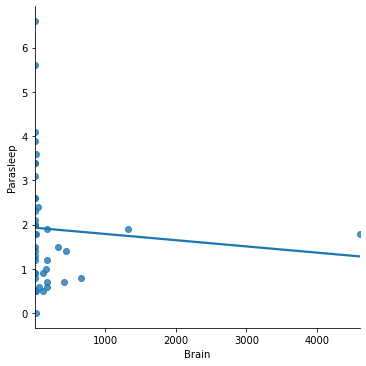

In [33]:
#Use Seaborn to create the scatterplot and overlay the regression line

import seaborn as sns

#Turn off CI plotting for today
sns.lmplot(x="Brain", y="Parasleep", data=sleep, ci=None)

In [34]:
#Are brain and body size correlated?

import scipy.stats as st

r, p_val = st.pearsonr(sleep['Brain'], sleep['Body'])


print(r)

0.9558487458480076


In [36]:
#### Calculate the brain to body size ratio
sleep['Brain_ratio'] = sleep['Brain']/sleep['Body']

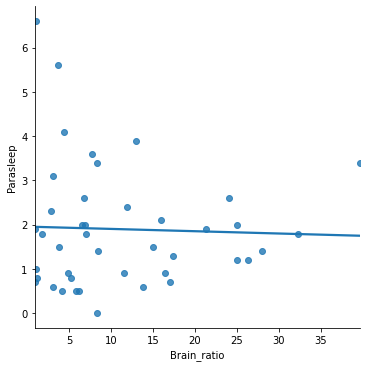

In [37]:
#Plot brain to body size ratio

sns.lmplot(x="Brain_ratio", y="Parasleep", data=sleep, ci=None)

What do you think about this relationship???

In [38]:
import statsmodels.api as sm

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ Brain_ratio', data=sleep).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.05213
Date:                Mon, 02 Aug 2021   Prob (F-statistic):              0.821
Time:                        12:22:50   Log-Likelihood:                -72.857
No. Observations:                  42   AIC:                             149.7
Df Residuals:                      40   BIC:                             153.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9580      0.334      5.865      

Conclusions???
There is no statistically linear relationship between the brain/body size ratio and dreaming lseep at the 0.05 level
 

Other transformations???

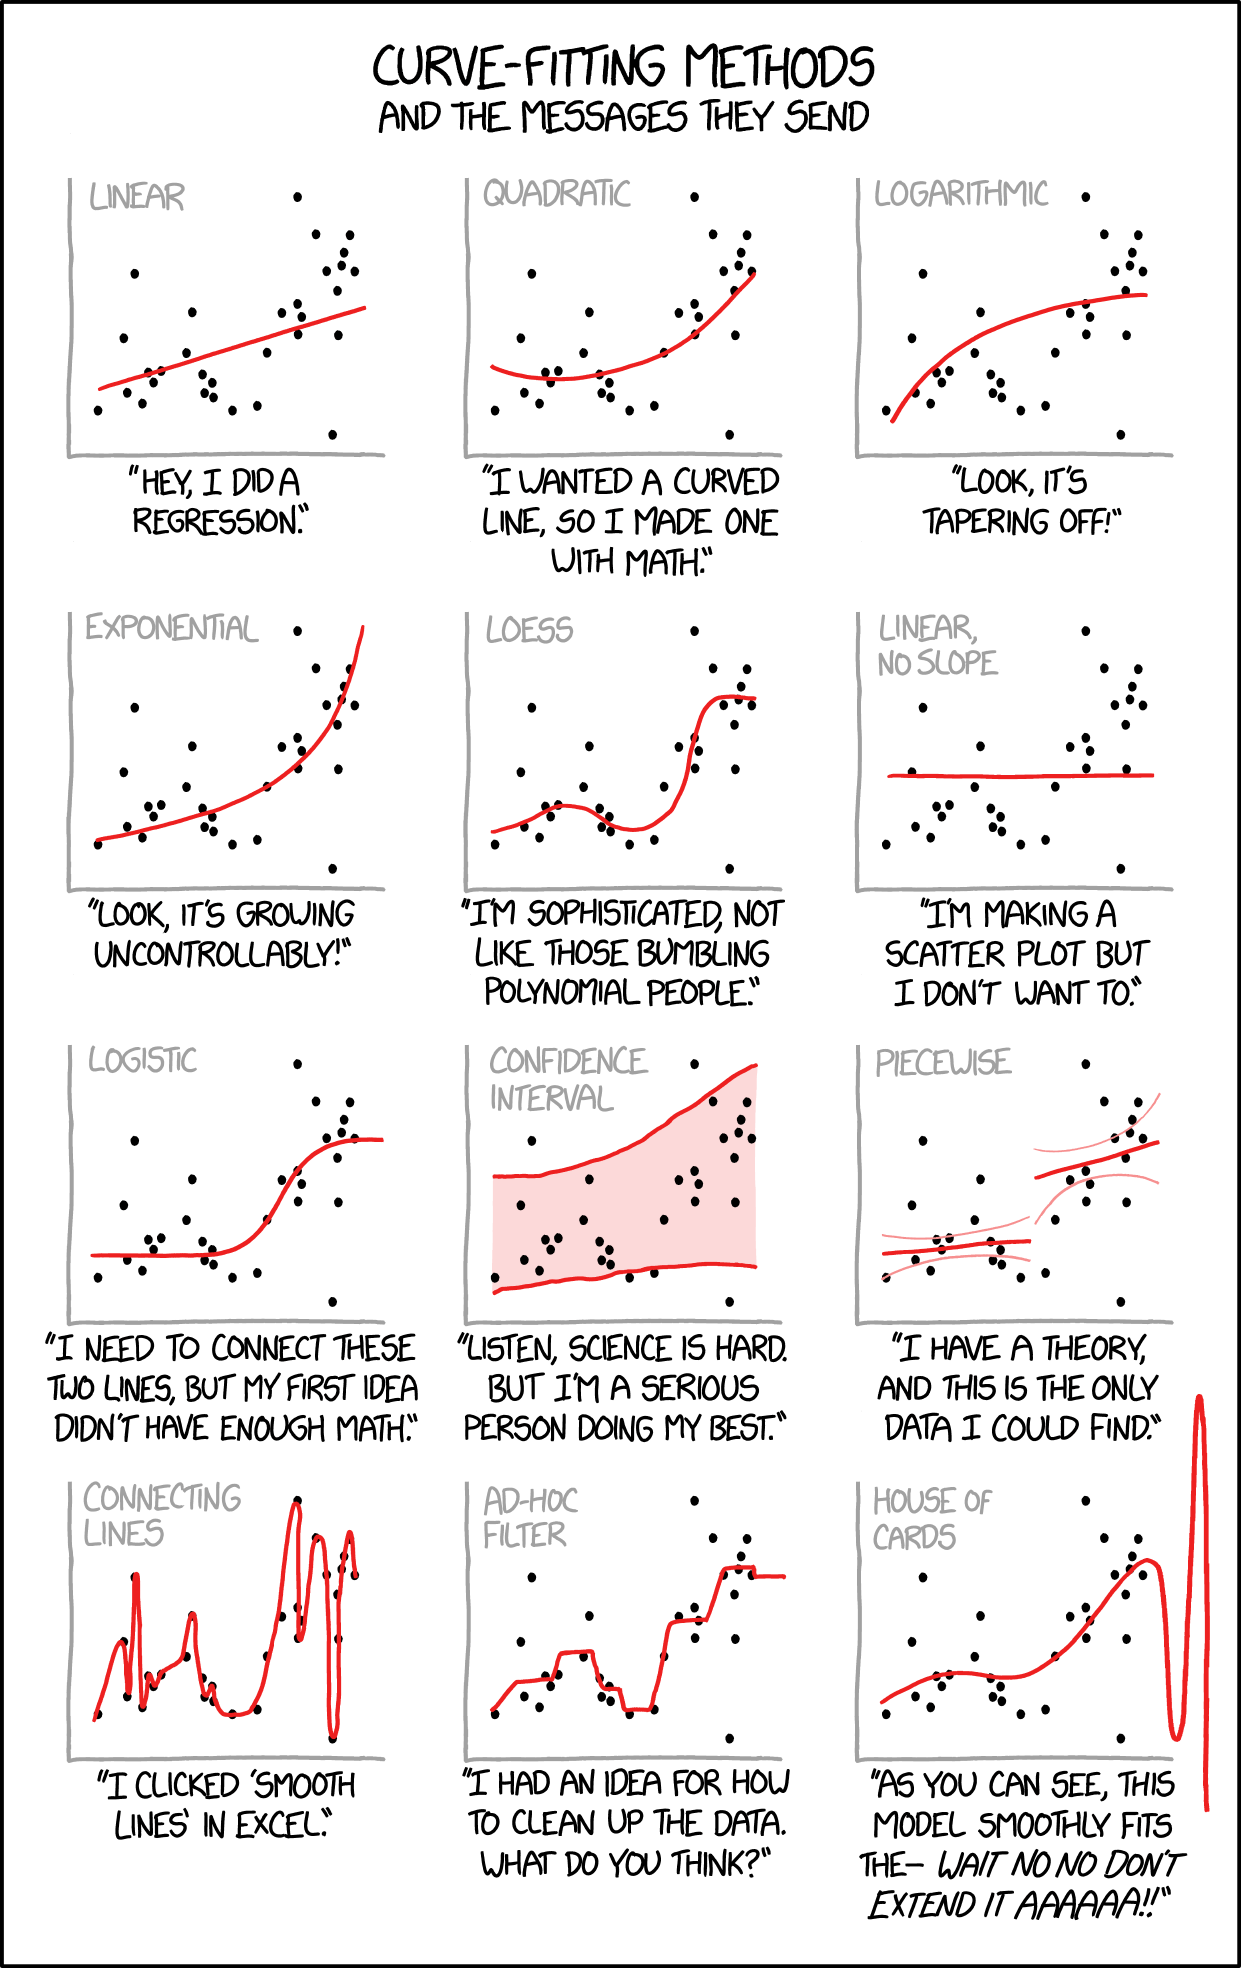